# Representación de los datos del covid-19 en Colombia y en BOGOTÁ

## 1. Preparación de los paquetes y los datos.
### 1.1 Importe de paquetes necesarios

In [1]:
#!pip install geopandas
#!pip install unidecode

In [2]:
import datetime
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3 as sql
import ogr
import unidecode
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

### 1.2 Conexión con la base de datos

In [3]:
database_name = "datasets/covid.db"
conn = sql.connect(database_name)
print(f'database connected {sql.version}')

database connected 2.6.0


## 2. Extracción y representacion de los datos de covid-19 en Colombia

## 2.1 Mapa de personas contagiadas

### 2.1.1 Consulta a la base de datos de el número de contagios por departamento

In [4]:
table_name = 'covidt'
query = f"select departamento , count(*) as total from {table_name}  GROUP BY departamento ORDER BY total DESC"
data_departamentos = pd.read_sql(query, conn)
data_departamentos.head()

,departamento,total
0,BOGOTA,321596
1,ANTIOQUIA,169425
2,VALLE,83342
3,CUNDINAMARCA,42455
4,SANTANDER,42328


### 2.1.2 Lectura y muestra del mapa de Colombia

<AxesSubplot:>

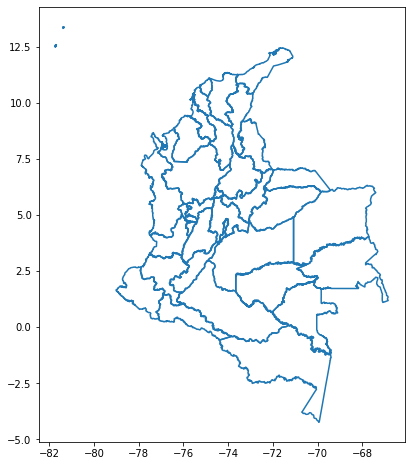

In [8]:
map_col = gpd.read_file('datasets/departamentos_colombia1.geojson')
map_col.boundary.plot()

### 2.1.3 Union de los datos del mapa y los de covid-19



tambien se guardan en la base de datos en una nueva tabla

In [9]:
# deps_accent = map_col['departamento'].tolist()
# for i in range(len(deps_accent)):
#     if deps_accent[i]:
#         deps_accent[i] = unidecode.unidecode(deps_accent[i])
#     else:
#         deps_accent[i] = deps_accent[i]

# map_col['departamento'] = deps_accent
# map_col
map_covid_col = map_col.merge(data_departamentos, on='departamento', how='outer')
map_covid_col.head()

,cartodb_id,pais,departamento,n_universidades,geometry,total
0,1.0,Colombia,AMAZONAS,1.0,"MULTIPOLYGON (((-71.29209 0.06823, -71.28826 0...",2908.0
1,19.0,Colombia,GUAJIRA,1.0,"MULTIPOLYGON (((-71.66677 12.45822, -71.66662 ...",10060.0
2,2.0,Colombia,ANTIOQUIA,16.0,"MULTIPOLYGON (((-76.40313 8.85156, -76.40290 8...",169425.0
3,34.0,None,None,NaN,None,NaN
4,3.0,Colombia,ARAUCA,0.0,"MULTIPOLYGON (((-70.67672 7.09265, -70.67667 7...",3347.0


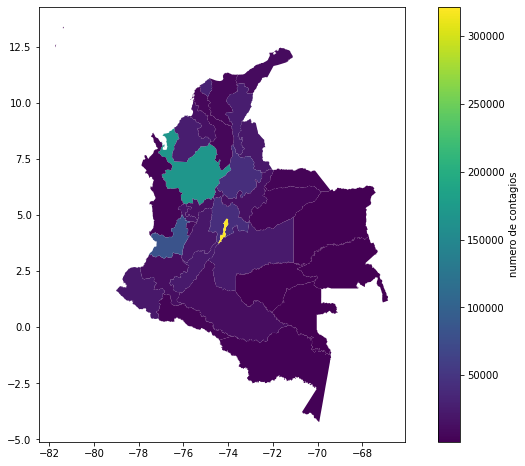

In [15]:
fig, ax = plt.subplots(1, 1)
map_covid_col.plot(column='total', ax=ax, legend=True, legend_kwds={'label': "numero de contagios"})
plt.savefig('plots/contagiados_colombia.png')

## 2.2 Mapa de personas  recuperadas por departamentos

### 2.2.1 Consulta a la base de datos de el número de recuperados por departamento

In [16]:
query2 = f"select departamento,count(*) as Total from {table_name} where atencion='Recuperado' group by departamento order by Total desc"
data_departamentos_rec = pd.read_sql(query2, conn)
data_departamentos_rec.head()

,departamento,Total
0,BOGOTA,291598
1,ANTIOQUIA,154986
2,VALLE,74460
3,CUNDINAMARCA,38697
4,BARRANQUILLA,38409


### 2.2.2 Union de los datos del mapa y los de covid-19
Como el mapa ya se creo en la seccion 2.1.2 y se guardo en una variable, tambien se tomara para este caso

In [17]:
map_recuperados_col = map_col.merge(data_departamentos_rec, on='departamento', how='outer')
map_recuperados_col.head()

,cartodb_id,pais,departamento,n_universidades,geometry,Total
0,1.0,Colombia,AMAZONAS,1.0,"MULTIPOLYGON (((-71.29209 0.06823, -71.28826 0...",2773.0
1,19.0,Colombia,GUAJIRA,1.0,"MULTIPOLYGON (((-71.66677 12.45822, -71.66662 ...",9014.0
2,2.0,Colombia,ANTIOQUIA,16.0,"MULTIPOLYGON (((-76.40313 8.85156, -76.40290 8...",154986.0
3,34.0,None,None,NaN,None,NaN
4,3.0,Colombia,ARAUCA,0.0,"MULTIPOLYGON (((-70.67672 7.09265, -70.67667 7...",2936.0


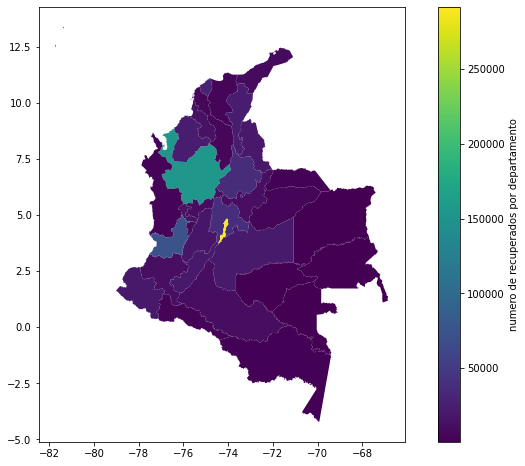

In [18]:
fig, ax = plt.subplots(1, 1)
map_recuperados_col.plot(column='Total', ax=ax, legend=True, legend_kwds={'label': "numero de recuperados por departamento"})
plt.savefig('plots/recuperados_colombia.png')

## 2.3 Mapa de personas  Fallecidas por departamentos

### 2.3.1 Consulta a la base de datos de el número de fallecidos por departamento

In [19]:
query3= f"select departamento,count(*) as Total from {table_name} where atencion='Fallecido' or atencion='fallecido' group by departamento order by Total desc"
data_departamentos_fall = pd.read_sql(query3, conn)
data_departamentos_fall.head()

,departamento,Total
0,BOGOTA,7650
1,ANTIOQUIA,3221
2,VALLE,2799
3,BARRANQUILLA,1705
4,SANTANDER,1693


### 2.3.2 Union de los datos del mapa y los de covid-19
Como el mapa ya se creo en la seccion 2.1.2 y se guardo en una variable, tambien se tomara para este caso

In [20]:
map_fallecidos_fall = map_col.merge(data_departamentos_fall, on='departamento', how='outer')
map_fallecidos_fall.head()

,cartodb_id,pais,departamento,n_universidades,geometry,Total
0,1.0,Colombia,AMAZONAS,1.0,"MULTIPOLYGON (((-71.29209 0.06823, -71.28826 0...",117.0
1,19.0,Colombia,GUAJIRA,1.0,"MULTIPOLYGON (((-71.66677 12.45822, -71.66662 ...",407.0
2,2.0,Colombia,ANTIOQUIA,16.0,"MULTIPOLYGON (((-76.40313 8.85156, -76.40290 8...",3221.0
3,34.0,None,None,NaN,None,NaN
4,3.0,Colombia,ARAUCA,0.0,"MULTIPOLYGON (((-70.67672 7.09265, -70.67667 7...",94.0


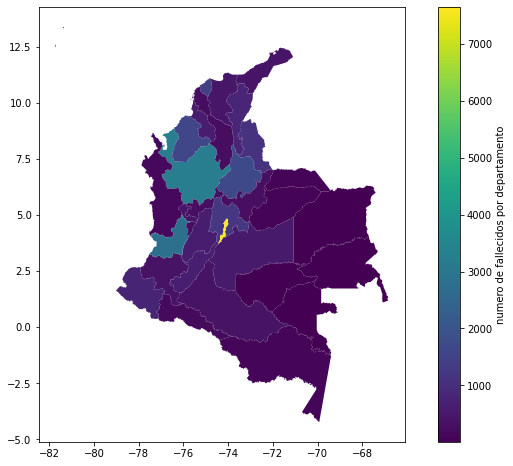

In [22]:
fig, ax = plt.subplots(1, 1)
map_fallecidos_fall.plot(column='Total', ax=ax, legend=True, legend_kwds={'label': "numero de fallecidos por departamento"})
plt.savefig('plots/fallecidos_colombia.png')

## 3. Extracción y representacion de los datos de covid-19 en Bogota por localidades

### 3.1 Mapa de personas contagiadas en Bogotá por localidad

### 3.1.1 Consulta a la base de datos de el número de contagios por localidad de Bogotá

In [23]:
query4 ="select LOCALIDAD_ASIS,count(*) as Total from  covidbogota GROUP BY LOCALIDAD_ASIS ORDER BY Total DESC"
data_bog_cont = pd.read_sql(query4, conn)
data_bog_cont.head()

,LOCALIDAD_ASIS,Total
0,Kennedy,42296
1,Suba,41330
2,Engativá,32916
3,Bosa,26841
4,Ciudad Bolívar,21795


### 3.1.2 Lectura y muestra del mapa de Bogotá

<AxesSubplot:>

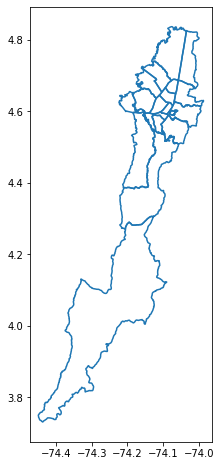

In [24]:
map_bog = gpd.read_file('datasets/poligonos-localidades.geojson')
map_bog=map_bog.rename(columns={'Nombre de la localidad':'LOCALIDAD_ASIS'})
map_bog.boundary.plot()

### 3.1.3 Union de los datos del mapa y los de covid-19



tambien se guardan en la base de datos en una nueva tabla

In [25]:
map_covid_bog = map_bog.merge(data_bog_cont, on='LOCALIDAD_ASIS', how='outer')
map_covid_bog.head()

,Acto administrativo de la localidad,LOCALIDAD_ASIS,Area de la localidad,Identificador unico de la localidad,geometry,Total
0,Acuerdo 117 de 2003,Antonio Nariño,"4879543,386426",15,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4...",4385.0
1,Acuerdo 8 de 1977,Teusaquillo,"14193168,127546",13,"MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4...",5535.0
2,Acuerdo 9 de 1986,SUMAPAZ,"780968757,719072",20,"MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4...",NaN
3,Acuerdo 117 de 2003,San Cristóbal,"49098548,52917",04,"MULTIPOLYGON (((-74.02900 4.55830, -74.02892 4...",15793.0
4,Acuerdo 8 de 1977,Usaquén,"65315721,646621",01,"MULTIPOLYGON (((-74.01089 4.66358, -74.01077 4...",18007.0


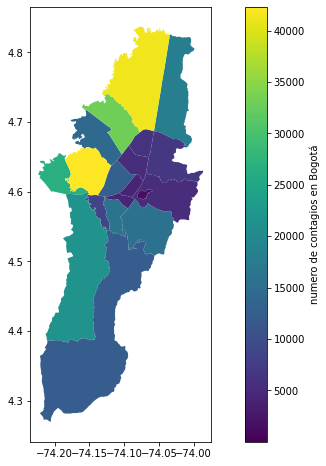

In [27]:
fig, ax = plt.subplots(1, 1)
map_covid_bog.plot(column='Total', ax=ax, legend=True, legend_kwds={'label': "numero de contagios en Bogotá"})
plt.savefig('plots/contagios_bogota.png')

### 3.2 Mapa de personas recuperadas en Bogotá por localidad

3.2.1 Consulta a la base de datos de el número de recuperados por localidad de Bogotá

In [28]:
table_name = 'covidt'
query5 ="select LOCALIDAD_ASIS,count(*) as Total from covidbogota where ESTADO='Recuperado' GROUP BY LOCALIDAD_ASIS ORDER BY Total DESC"
data_bog_rec = pd.read_sql(query5, conn)
data_bog_rec.head()

,LOCALIDAD_ASIS,Total
0,Kennedy,39089
1,Suba,38273
2,Engativá,30256
3,Bosa,25111
4,Ciudad Bolívar,20181


### 3.2.2 Union de los datos del mapa y los de covid-19



Tambien se guardan en la base de datos en una nueva tabla, ademas se toma el mapa de la sección 3.1.2

In [29]:
map_rec_bog = map_bog.merge(data_bog_rec, on='LOCALIDAD_ASIS', how='outer')
map_rec_bog.head()

,Acto administrativo de la localidad,LOCALIDAD_ASIS,Area de la localidad,Identificador unico de la localidad,geometry,Total
0,Acuerdo 117 de 2003,Antonio Nariño,"4879543,386426",15,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4...",3999.0
1,Acuerdo 8 de 1977,Teusaquillo,"14193168,127546",13,"MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4...",4991.0
2,Acuerdo 9 de 1986,SUMAPAZ,"780968757,719072",20,"MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4...",NaN
3,Acuerdo 117 de 2003,San Cristóbal,"49098548,52917",04,"MULTIPOLYGON (((-74.02900 4.55830, -74.02892 4...",14468.0
4,Acuerdo 8 de 1977,Usaquén,"65315721,646621",01,"MULTIPOLYGON (((-74.01089 4.66358, -74.01077 4...",16570.0


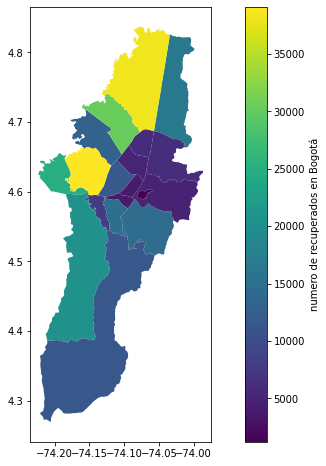

In [30]:
fig, ax = plt.subplots(1, 1)
map_rec_bog.plot(column='Total', ax=ax, legend=True, legend_kwds={'label': "numero de recuperados en Bogotá"})
plt.savefig('plots/recuperados_bogota.png')

### 3.3 Mapa de personas fallecidas en Bogotá por localidad

3.3.1 Consulta a la base de datos de el número de recuperados por localidad de Bogotá

In [31]:
query6 ="select LOCALIDAD_ASIS,count(*) as Total from covidbogota where ESTADO='Fallecido' GROUP BY LOCALIDAD_ASIS ORDER BY Total DESC"
data_bog_fall = pd.read_sql(query6, conn)
data_bog_fall.head()

,LOCALIDAD_ASIS,Total
0,Kennedy,1035
1,Suba,911
2,Engativá,800
3,Bosa,604
4,Ciudad Bolívar,540


In [32]:
map_fall_bog = map_bog.merge(data_bog_fall, on='LOCALIDAD_ASIS', how='outer')
map_fall_bog.head()

,Acto administrativo de la localidad,LOCALIDAD_ASIS,Area de la localidad,Identificador unico de la localidad,geometry,Total
0,Acuerdo 117 de 2003,Antonio Nariño,"4879543,386426",15,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4...",156.0
1,Acuerdo 8 de 1977,Teusaquillo,"14193168,127546",13,"MULTIPOLYGON (((-74.09372 4.66607, -74.10342 4...",147.0
2,Acuerdo 9 de 1986,SUMAPAZ,"780968757,719072",20,"MULTIPOLYGON (((-74.20584 4.26966, -74.20567 4...",NaN
3,Acuerdo 117 de 2003,San Cristóbal,"49098548,52917",04,"MULTIPOLYGON (((-74.02900 4.55830, -74.02892 4...",442.0
4,Acuerdo 8 de 1977,Usaquén,"65315721,646621",01,"MULTIPOLYGON (((-74.01089 4.66358, -74.01077 4...",394.0


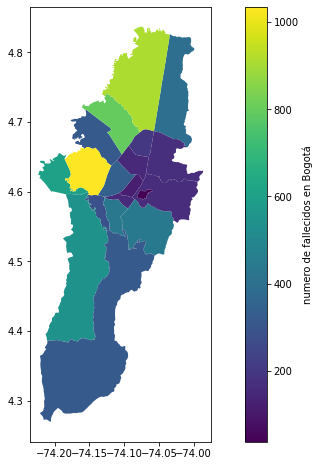

In [33]:
fig, ax = plt.subplots(1, 1)
map_fall_bog.plot(column='Total', ax=ax, legend=True, legend_kwds={'label': "numero de fallecidos en Bogotá"})
plt.savefig('plots/fallecidos_bogota.png')